<a href="https://colab.research.google.com/github/Areeba391391/mnist/blob/main/MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (1).zip to archive (1) (1).zip
Uploaded file: archive (1) (1).zip
Files after unzip:
mnist_train.csv
mnist_test.csv

Train file: mnist_data/mnist_train.csv
Test file: mnist_data/mnist_test.csv

Train Shape: (60000, 785)
Test Shape: (10000, 785)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Accuracy: 0.9259

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


Confusion Matrix:

[[ 958    0    1    3    1    9    4    3    1    0]
 [   0 1111    5    2    0    2    3    1   11    0]
 [   6    9  931   16   10    3   12   10   31    4]
 [   4    1  

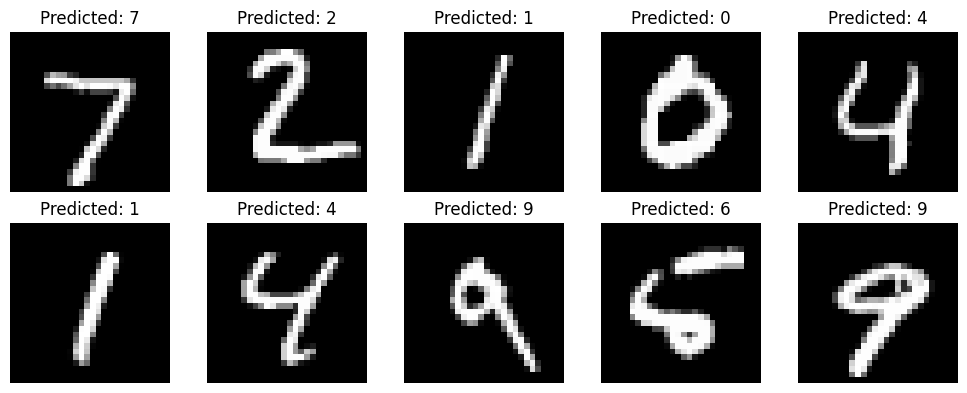

In [5]:
# ================================
# MNIST DIGIT RECOGNITION PROJECT
# ZIP FILE SUPPORTED
# ================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import files

# ================================
# 2. Upload ZIP File
# ================================
uploaded = files.upload()
zip_name = list(uploaded.keys())[0]
print("Uploaded file:", zip_name)

# ================================
# 3. Unzip Dataset
# ================================
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("mnist_data")

print("Files after unzip:")
for root, dirs, files_list in os.walk("mnist_data"):
    for file in files_list:
        print(file)

# ================================
# 4. Locate Train & Test CSV
# ================================
train_file = None
test_file = None

for root, dirs, files_list in os.walk("mnist_data"):
    for file in files_list:
        if 'train' in file.lower():
            train_file = os.path.join(root, file)
        elif 'test' in file.lower():
            test_file = os.path.join(root, file)

print("\nTrain file:", train_file)
print("Test file:", test_file)

# ================================
# 5. Load Dataset
# ================================
train_data = pd.read_csv(train_file)
test_data  = pd.read_csv(test_file)

print("\nTrain Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

# ================================
# 6. Separate Features & Labels
# ================================
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# ================================
# 7. Normalize Pixel Values
# ================================
X_train = X_train / 255.0
X_test  = X_test / 255.0

# ================================
# 8. Train Model
# Algorithm: Logistic Regression
# ================================
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='auto'
)

model.fit(X_train, y_train)

# ================================
# 9. Predictions
# ================================
y_pred = model.predict(X_test)

# ================================
# 10. Evaluation
# ================================
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ================================
# 11. Visualize Predictions
# ================================
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
